Tuning $\gamma_D$

In [2]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [3]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

In [42]:
sharpes, std = db.test_gamma_D_params(['EEM', 'IVV', 'IEV', 'IXN', 'TLT'], number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=7e-7, gamma_end=1e-1, gamma_num=2000)

['EEM', 'IVV', 'IEV', 'IXN', 'TLT']
[*********************100%***********************]  5 of 5 completed


In [43]:
sharpes_pd = pd.DataFrame(sharpes, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_pd.set_index('gamma_D', drop=True, inplace=True)
std_pd = pd.DataFrame(std, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_pd.set_index('gamma_D', drop=True, inplace=True)

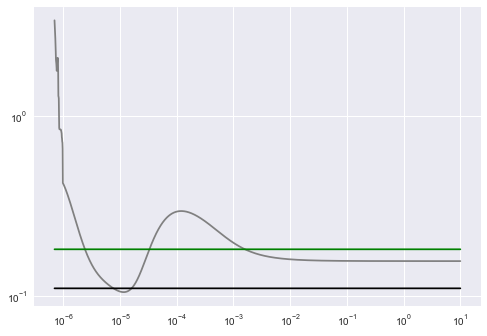

In [46]:
plt.plot(std_pd)
plt.xscale('log')
plt.yscale('log')
plt.show()

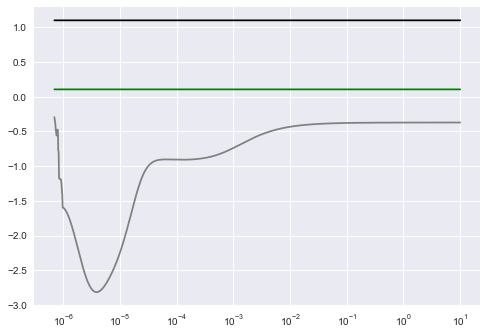

In [47]:
plt.plot(sharpes_pd)
plt.xscale('log')
#plt.yscale('log')
plt.show()